<font color="maroon" size="6"><center><b>Decision Tree Classifier</b></center></font>
<font color="Royalblue" size="4"><center>Owner: Sushant Borade</center></font>
<font color="Royalblue" size="4"><center>Mail ID: sushant.9196@gmail.com</center></font>

<font size="4"><b>Loading the Package</b></font>

In [1]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
# Evalution 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


<font size="4" color="green"><b>User Defined Function</b></font>

In [2]:
def scatter_regplot(x, y, in_data): 
    '''
    Returns Scatter plot with regression trend line
    '''
    
    sns.regplot(x=x, y=y, data=in_data) 
    plt.xlabel(x, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + x + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

In [3]:
def HeatMap(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 7))        # Sample figsize in inches
    sns.heatmap(corr,annot=True ,linewidths=.10,ax=ax,cmap='YlGnBu',mask=mask, vmin = -1,vmax=1,)
    bottom, top = ax.get_ylim()
    #print("Bottom is ",bottom,"After adding",bottom+0.5)
    #print("TOp is ",top,"After adding",top-0.5)
    ax.set_ylim(bottom + 0.5, top - 0.5)

<font size="4" color="green"><b>Loading the Data Set</b></font>

In [4]:
filepath = r"F:\github"
filename = "Shopping_status.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [5]:
data.head() #Top 5 rows

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.tail() #Bottom 5 rows

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


<font size="4" color="red"><b>Data Cleaning</b></font>

In [7]:
data.shape #Find no or rows and columns

(400, 5)

In [8]:
data.columns #To get column Names

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
data['User ID'].nunique(),data.shape[0]

(400, 400)

<font size="3">We Can see that unique value in "User ID" column is same as that of no of rows, thus "User ID" column can just be consider as a row identifier So we can drop that column</font>

<Font color="Red" size="4"><b>Remove Unwanted Columns</b></Font>

In [10]:
data = data.drop(["User ID"], axis = 1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


<font size="4" color="red"><b>Check For missing values</b></font>

In [11]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<font size="4" color="green"><b>Lucky !! No missing data :)</b></font>

<font size="4" color="red"><b>Univarate Analysis</b></font>

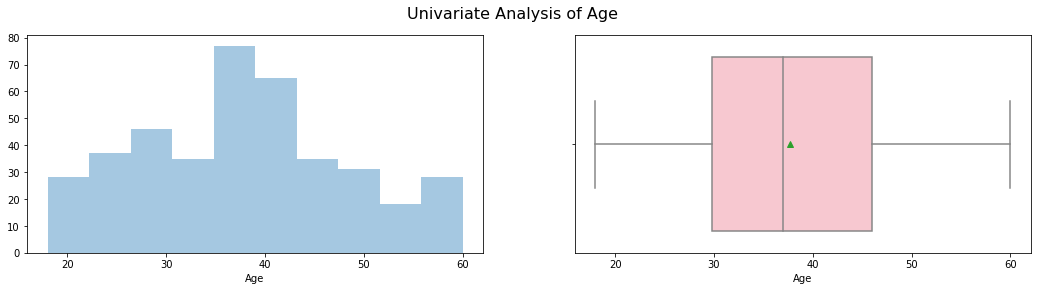

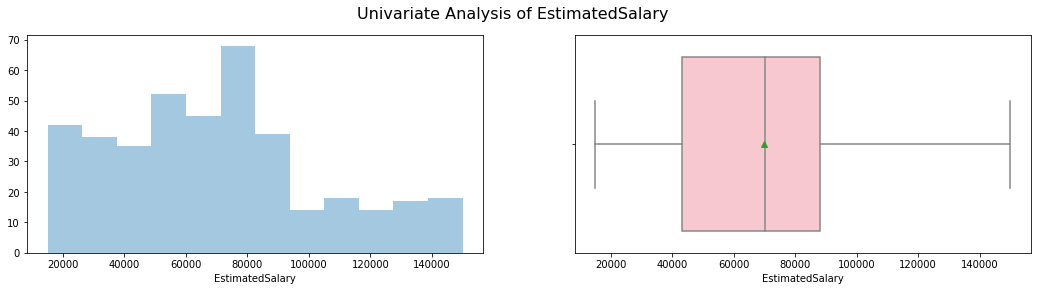

In [12]:
x_axis = ["Age", "EstimatedSalary"]
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(data[x], ax=axes[0], kde = False)
    sns.boxplot(data[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

<font size="4" color="red"><b>Bi-Variate Analysis</b></font>

<font size="4"><b>scatter plot between input feature</b></font>

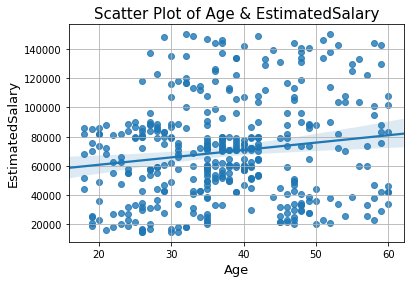

In [13]:
scatter_regplot('Age','EstimatedSalary',data)

<font color="blue" size="4"><b>Correlation Using Heatmap</b></font>

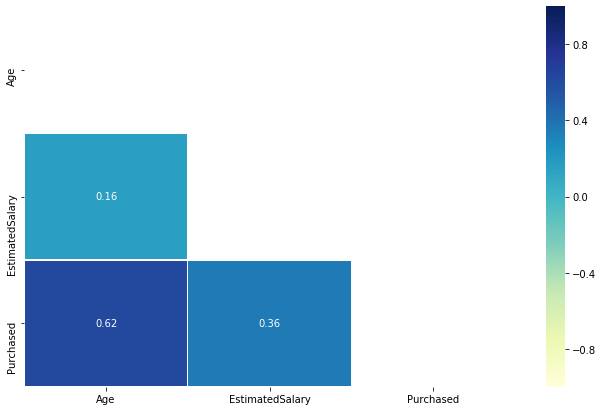

In [14]:
HeatMap(data)

<font size="4" color="green"><b>We can see that there is no correlation between input feature thus there is no multicollinearity and we can use both age and estimated salary in the model</b></font>

<font size="4" color="green"><b> To check Impact of "Estimated Salary" On "Purchased"</b></font>

<font size="4"><b> Purchased being Categorical and Estimated Salary being continuous we can use Anova Test</b></font> 

<Font color="blue" size="4"><b>Anova Test: To check for mean Difference between groups is significant or not !!
</b></font>

 * Null Hypothesis = No difference in group Mean
 * Alternate Hypothesis = Difference in group Mean

In [15]:
anova_df = data.copy()

In [16]:
import scipy.stats as stats

In [17]:
fvalue, pvalue = stats.f_oneway(anova_df[anova_df["Purchased"] == 1]["EstimatedSalary"], 
                               anova_df[anova_df["Purchased"] == 0]["EstimatedSalary"])

fvalue, pvalue

(60.05257919927239, 7.772785450069512e-14)

In [18]:
if (pvalue <= 0.05):
    print ("Reject Ho: There is difference")
else:
    print ("Accept Ho: Opss !! no difference")

Reject Ho: There is difference


<font size="3"> We Can also check mean of all group using Box plot </font>

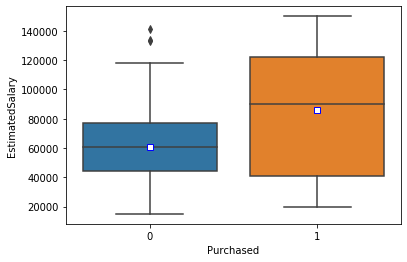

In [19]:
sns.boxplot(x = "Purchased", y = "EstimatedSalary", showmeans=True,data = data,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

<font size="3"> Thus From Box Plot also we can see that "white Square" of all the groups are different i.e mean of all group is different</font>

<font size="4" color="green"><b> To check Impact of "Age" On "Purchased"</b></font>

<font size="4"><b> Purchased being Categorical and Age being continuous we can use Anova Test</b></font> 


<Font color="blue" size="4"><b>Anova Test: To check for mean Difference between groups is significant or not !!
</b></font>

 * Null Hypothesis = No difference in group Mean
 * Alternate Hypothesis = Difference in group Mean

In [20]:
anova_df = data.copy()

In [21]:
import scipy.stats as stats

In [22]:
fvalue, pvalue = stats.f_oneway(anova_df[anova_df["Purchased"] == 1]["Age"], 
                               anova_df[anova_df["Purchased"] == 0]["Age"])

fvalue, pvalue

(251.74206107179123, 2.800233943273413e-44)

In [23]:
if (pvalue <= 0.05):
    print ("Reject Ho: There is difference")
else:
    print ("Accept Ho: Opss !! no difference")

Reject Ho: There is difference


<font size="3"> We Can also check mean of all group using Box plot </font>

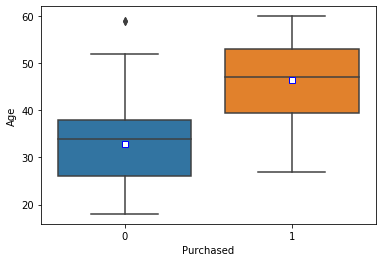

In [24]:
sns.boxplot(x = "Purchased", y = "Age", showmeans=True,data = data,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

<font size="3"> Thus From Box Plot also we can see that "white Square" of all the groups are different i.e mean of all group is different</font>

<font size="4" color="green"><b>Thus we Can see that from above two Anova test that Both Age and Estimated have mean difference w.r.t Purchased Thus giving an clear idea that Age and estimated Salary are important for predicting Purchased</b></font>

<font size="4" color="green"><b>To check relation between Two catgorical variable we will use Chi-square Test</b></font>

    * Null Hypothesis = There is no association between the two variables
    * Alternate Hypothesis = There is an association between the two variables

In [25]:
table = pd.crosstab(data['Gender'],data['Purchased'])
table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [26]:
from scipy.stats import chi2_contingency

chi2_contingency(table)

(0.5550869364098915, 0.45624659183130645, 1, array([[131.07,  72.93],
        [125.93,  70.07]]))

In [27]:
stat,p,dof,expected = chi2_contingency(table)

In [28]:
if (p <= 0.05):
    print ("Reject Ho: There is an association between the two variables")
else:
    print ("Accept Ho: There is no association between the two variables")

Accept Ho: There is no association between the two variables


<font size="4" color="green"><b>Thus Chi-square Test tells that us that there is no association between Gender and Purchased, Thus it's ok if you don't add gender feature in model</b></font>

<Font color="blue" size="4"><b>Scatter Plot</b></font>

 * X = Estimated Salary
 * Y = Age
 * Hue = Purchased    

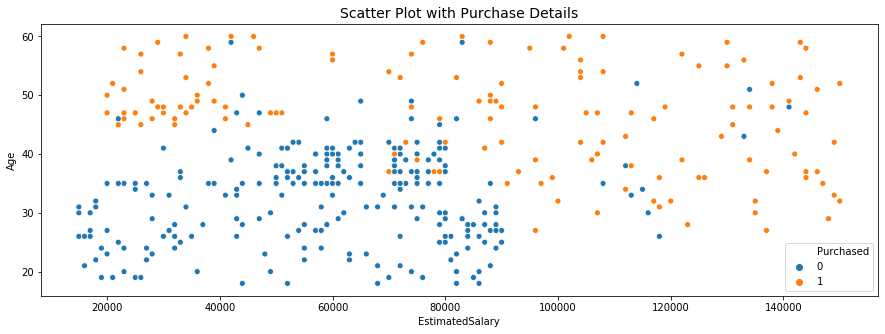

In [29]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = "EstimatedSalary", y = "Age", data = data, hue = "Purchased")
plt.title("Scatter Plot with Purchase Details", fontsize = 14)
plt.show()

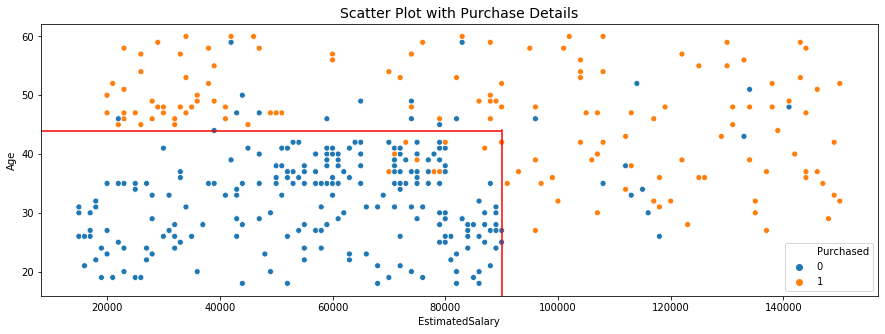

In [30]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = "EstimatedSalary", y = "Age", data = data, hue = "Purchased")
plt.title("Scatter Plot with Purchase Details", fontsize = 14)
plt.axvline(90000,ymin= 0, ymax = 0.61, color = "red")
plt.axhline(44, xmin = 0, xmax = 0.55, color = "red")
#plt.axvline(90000, color = "red")
#plt.axhline(40, color = "red")
plt.show()

<font size="4" color="green"><b>Insights</b></font> 
    
    * Looks like this shop is not for people earning < 90k & Age < 40
    * Can we launch a product for Q3?
    * Any other service can be provided to on going customers?
    * Promotion plans & advertisment ideas

<font size="6" color="maroon"><b><center><u>Model 5: Decision Tree Classifier
</u></center></b></font>

In [38]:
X = data[["Age", "EstimatedSalary"]]
y = data[["Purchased"]]

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)   # 70-30 Split

dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

y_train_predict = dt.predict(X_train)   # Train

X_train_op = X_train.copy()
X_train_op["Y_train_actuals"] = y_train["Purchased"]
X_train_op["Y_train_Pred"] = y_train_predict
X_train_op.tail()

,Age,EstimatedSalary,Y_train_actuals,Y_train_Pred
343,47,51000,1,1
359,42,54000,0,0
323,48,30000,1,1
280,59,88000,1,1
8,25,33000,0,0


In [39]:
accuracy_score(X_train_op["Y_train_actuals"], X_train_op["Y_train_Pred"]) *100 # Accuarcy using package

91.5625

In [40]:
accuracy_score(y_test, dt.predict(X_test)) *100 # Accuarcy using package on Test

91.25

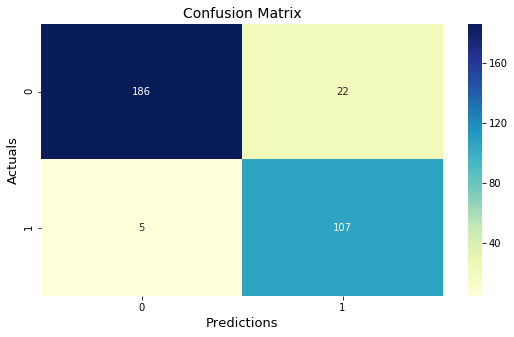

In [41]:
cnf_matrix = confusion_matrix(X_train_op["Y_train_actuals"], X_train_op["Y_train_Pred"])

f, ax = plt.subplots(figsize=(9, 5))        # Sample figsize in inches
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu", fmt='.3g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Actuals", fontsize = 13)
plt.xlabel("Predictions", fontsize = 13)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()

In [42]:
from sklearn.tree import plot_tree

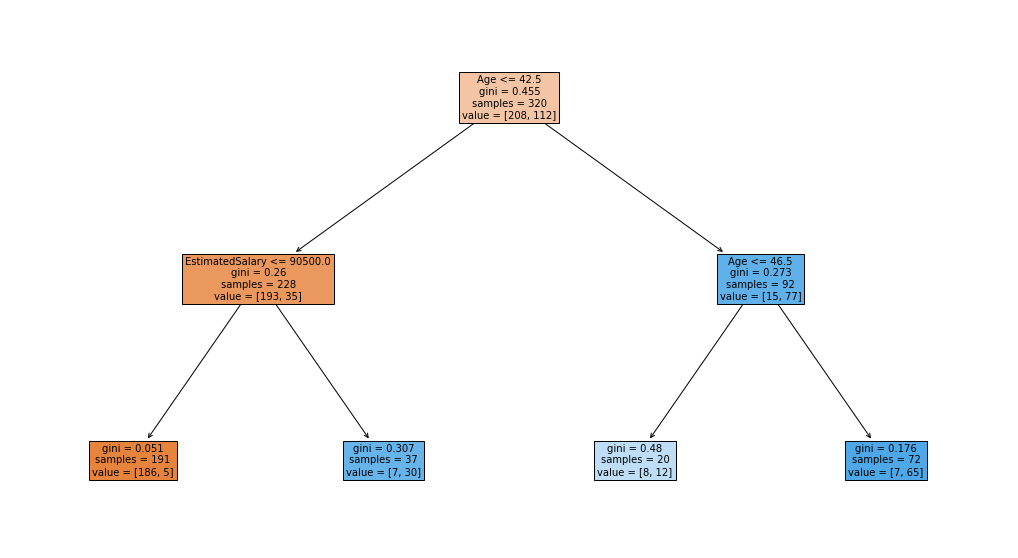

In [43]:
plt.figure(figsize = (18,10))
plot_tree(dt, filled=True, fontsize = 10, feature_names = X_train.columns.tolist())
plt.show()

<font size="4" color="green"><b>Gini Index Calculation</b></font>

In [44]:
# 1 - Prob sq
# All samples
gini = 1 - (300/320)**2 - (20/320)**2    # Low gini index is prefered 
round(gini,3)

0.117

<font size="4" color="green"><b>Conclusing Statement</b></font>

  We can conclude that Age and Estimated Salary gives an accuracy of 92% for train and 91% for test